In [1]:
# Assignment: ASSIGNMENT Term Project (Data Exploration - Employee Attrition)
# Name: Bezawada, Sashidhar
# Date: 2022-11-15

import os

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

import pandas as pd

from __future__ import print_function, division

%matplotlib inline

import nsfg
import numpy as np
import thinkstats2
import thinkplot

import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
fname = os.path.join("","WA_Fn-UseC_-HR-Employee-Attrition.csv")

employee_attr = pd.read_csv(fname)

employee_attr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


Dataset Variable Descriptions

1.	AGE Numerical Value
2.	ATTRITION Employee leaving the company (0=no, 1=yes)
3.	BUSINESS TRAVEL (1=No Travel, 2=Travel Frequently, 3=Travel Rarely)
4.	DAILY RATE Numerical Value - Salary Level
5.	DEPARTMENT (1=Human Resources, 2=Research & Development, 3=Sales)
6.	DISTANCE FROM HOME Numerical Value - THE DISTANCE FROM WORK TO HOME
7.	EDUCATION Numerical Value
8.	EDUCATION FIELD (1=HUMAN RESOURCES, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL DEGREE)
9.	EMPLOYEE COUNT Numerical Value
10.	EMPLOYEE NUMBER Numerical Value - Unique id that can be used as primary Key for the dataset 
11.	ENVIROMENT SATISFACTION Numerical Value - SATISFACTION WITH THE ENVIROMENT
12.	GENDER (1=FEMALE, 2=MALE)
13.	HOURLY RATE Numerical Value - HOURLY SALARY
14.	JOB INVOLVEMENT Numerical Value - JOB INVOLVEMENT
15.	JOB LEVEL Numerical Value - LEVEL OF JOB
16.	JOB ROLE (1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)
17.	JOB SATISFACTION Numerical Value - SATISFACTION WITH THE JOB
18.	MARITAL STATUS (1=DIVORCED, 2=MARRIED, 3=SINGLE)
19.	MONTHLY INCOME Numerical Value - MONTHLY SALARY
20.	MONTHY RATE Numerical Value - MONTHY RATE
21.	NUMCOMPANIES WORKED Numerical Value - NO. OF COMPANIES WORKED AT
22.	OVER 18 (1=YES, 2=NO)
23.	OVERTIME (1=NO, 2=YES)
24.	PERCENT SALARY HIKE Numerical Value - PERCENTAGE INCREASE IN SALARY
25.	PERFORMANCE RATING Numerical Value - PERFORMANCE RATING
26.	RELATIONS SATISFACTION Numerical Value - RELATIONS SATISFACTION
27.	STANDARD HOURS Numerical Value - STANDARD HOURS
28.	STOCK OPTIONS LEVEL Numerical Value - STOCK OPTIONS
29.	TOTAL WORKING YEARS Numerical Value - TOTAL YEARS WORKED
30.	TRAINING TIMES LAST YEAR Numerical Value - HOURS SPENT TRAINING
31.	WORK LIFE BALANCE Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE
32.	YEARS AT COMPANY Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY
33.	YEARS IN CURRENT ROLE Numerical Value -YEARS IN CURRENT ROLE
34.	YEARS SINCE LAST PROMOTION Numerical Value - LAST PROMOTION
35.	YEARS WITH CURRENT MANAGER Numerical Value - YEARS SPENT WITH CURRENT MANAGER


In [3]:
#Checking the data types
#Describing each field in the dataset
employee_attr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Age
•	Min: 18
•	Max: 60
•	Mean ~ 37

I am considering taking out the records for employees that are 18-years-old. In most situations, companies don't hire people this young unless it is for internships or possibly co-op work. I would think that these employees are more likely to leave a company anyway because they have to go back to school or they find another learning opportunity, etc. There are 8 employees that are of age 18 out of 1,470 so it would not affect the statistics to either leave them in or take them out though.

Also, I think most people start their careers after graduating college around age 22-23, so I think I will subset the sample to remove those ages to focus on the employees that are working full-time at the company and have their undergraduate degrees at least. I want the dataset to be more representative of the typical career path.

Daily Rate pertains to the salary level of an employee .. I don't think this field will give us as much information as hourly rate or monthly rate, so I am going to remove it.

Standard hours is the same value for every employee. 80 hours itself is a lot of time to work for the average employee, so these employees could all possibly be overworked and that could play into attrition as well :) but given that they all work the same amount, the column is not very useful. I am also taking out Employee Count as it has value 1 for all records and not adding value .

There are many "years" variables: total working years, training times last year, years at company, years in current role, years since last promotion, and years with current manager. I honestly think they are all helpful to our question of what are the dominant factors for why employees choose to leave a company? They all represent different things for the employee and could play key roles in the analysis of the question.

For Education Field, I think it is very common these days that people don't necessarily work in the field that they majored in. With that, I am going to drop this column as it doesn't seem extremely relevant to the problem of attrition.

Over 18 and OverTime binary variables (Yes/No)
•	Since I am considering removing the employees of age 18, this variable would not be useful (Over18).
•	OverTime -- everyone has to work overtime eventually and since there's not numerical variables showing how many hours of overtime or count of instances of overtime, it really doesn't describe much.

I am assuming that the employees represented in this dataset are full-time employees, which means that the rate variables would not be as significant as understanding their yearly incomes or salaries. Therefore, I am going to drop the 'rate' columns.


In [4]:
#Removing unnecessary columns
employee_attr = employee_attr.drop(columns=['HourlyRate','MonthlyRate','EducationField','Over18','OverTime','EmployeeCount','StandardHours','DailyRate'])
employee_attr

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,1,2,Female,3,2,Sales Executive,4,Single,5993,8,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,2,3,Male,2,2,Research Scientist,2,Married,5130,1,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,5,4,Female,3,1,Research Scientist,3,Married,2909,1,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,2061,3,Male,4,2,Laboratory Technician,4,Married,2571,4,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,2062,4,Male,2,3,Healthcare Representative,1,Married,9991,4,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,2064,2,Male,4,2,Manufacturing Director,2,Married,6142,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,2065,4,Male,2,2,Sales Executive,2,Married,5390,2,14,3,4,0,17,3,2,9,6,0,8


In [5]:
employee_attr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [6]:
#Adding new column for yearly salary to dataset
employee_attr['YearlyIncome'] = employee_attr['MonthlyIncome'] *12
employee_attr.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
0,41,Yes,Travel_Rarely,Sales,1,2,1,2,Female,3,2,Sales Executive,4,Single,5993,8,11,3,1,0,8,0,1,6,4,0,5,71916
1,49,No,Travel_Frequently,Research & Development,8,1,2,3,Male,2,2,Research Scientist,2,Married,5130,1,23,4,4,1,10,3,3,10,7,1,7,61560
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,15,3,2,0,7,3,3,0,0,0,0,25080
3,33,No,Travel_Frequently,Research & Development,3,4,5,4,Female,3,1,Research Scientist,3,Married,2909,1,11,3,3,0,8,3,3,8,7,3,0,34908
4,27,No,Travel_Rarely,Research & Development,2,1,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,12,3,4,1,6,3,3,2,2,2,2,41616


In [7]:
# Rows containing duplicate data -- none!
duplicate_rows_df = employee_attr[employee_attr.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

# Finding the null values -- also none!
print("\nNull values")
print(employee_attr.isnull().sum())

number of duplicate rows:  (0, 28)

Null values
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
YearlyIncome                0
dtype: int64


### Histograms

Histogram of Age

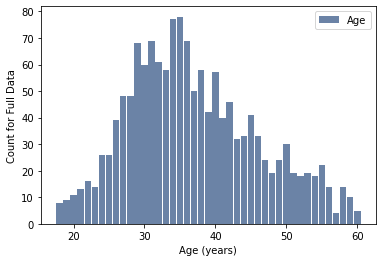

In [8]:
hist = thinkstats2.Hist(employee_attr.Age, label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age (years)', ylabel='Count for Full Data')

The distribution of age for the entire dataset is relatively left-skewed. From looking at the histogram, it looks like there are outliers from age 18- ~21. Those ages are quite young for employees at a company, as usually companies hire people with undergraduate degrees and most people graduate from college at age 22 or 23. I am going to remove this population from the dataset to more align with the dataset with normal working ages at a company.

In [9]:
employee_attr = employee_attr[employee_attr.Age > 22]

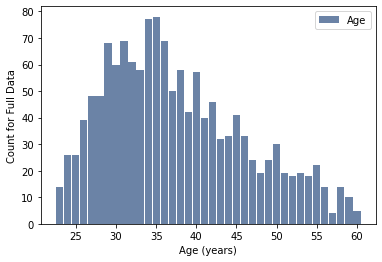

In [10]:
hist = thinkstats2.Hist(employee_attr.Age, label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age (years)', ylabel='Count for Full Data')

Histogram of Yearly Income and Monthly Income

In [11]:
#No missing values in the new column
employee_attr.YearlyIncome.isnull().sum()

0

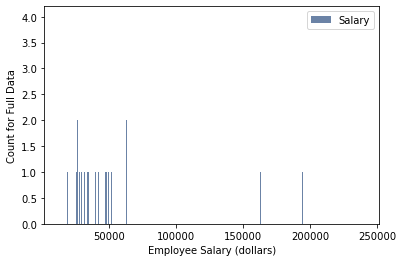

In [12]:
hist = thinkstats2.Hist(employee_attr.YearlyIncome, label='Salary')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Employee Salary (dollars)', ylabel='Count for Full Data')

In [13]:
#Analyzing outliers from yearly income analysis
reg_income = employee_attr[employee_attr.YearlyIncome < 100000]
reg_income.shape

(1043, 28)

In [14]:
high_income = employee_attr[employee_attr.YearlyIncome > 100000]
high_income.shape

(370, 28)

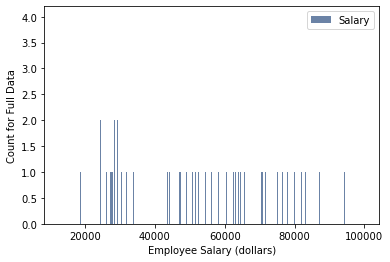

In [15]:
hist = thinkstats2.Hist(reg_income.YearlyIncome, label='Salary')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Employee Salary (dollars)', ylabel='Count for Full Data')

From the distributions of monthly income and yearly income, it is appararent that there are outlier values for salaries above 100,000 dollars. Depending on your job level and field, this salary range of above $100,000 can be attainable, but I think even with the outliers, salary plays a key role in determining if employees stay at a company. Therefore, I will not remove this subset.

The distributions for monthly income and yearly income for the entire dataset are the same, which makes sense as yearly income is calculated from the monthly incomes.

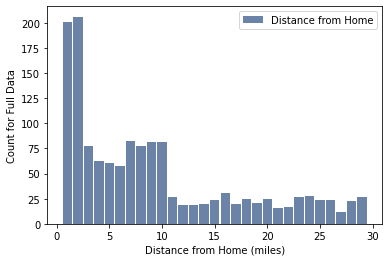

In [16]:
# Histogram of distance from home
hist = thinkstats2.Hist(employee_attr.DistanceFromHome, label='Distance from Home')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Distance from Home (miles)', ylabel='Count for Full Data')


•	Left-skewed distribution

•	The IBM office for most employees is relatively close to their homes, less than ~3 miles

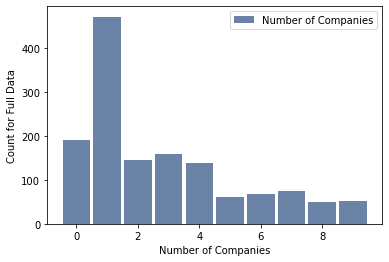

In [17]:
# Histogram of NumCompanies Worked and PercentSalaryHike
hist = thinkstats2.Hist(employee_attr.NumCompaniesWorked, label='Number of Companies')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of Companies', ylabel='Count for Full Data')

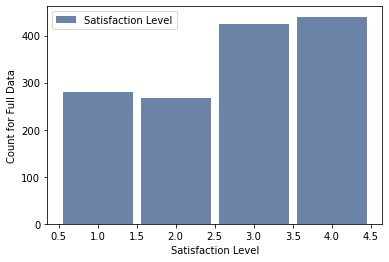

In [18]:
# Histogram of JobSatisfaction
hist = thinkstats2.Hist(employee_attr.JobSatisfaction, label='Satisfaction Level')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Satisfaction Level', ylabel='Count for Full Data')

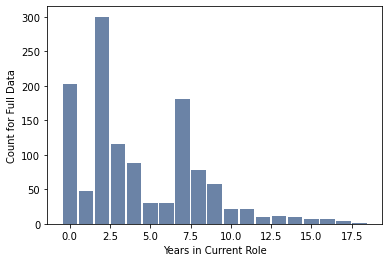

In [80]:
# Histogram of YearsInCurrentRole          
hist = thinkstats2.Hist(employee_attr.YearsInCurrentRole, label='Years in Current Role')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Years in Current Role', ylabel='Count for Full Data')

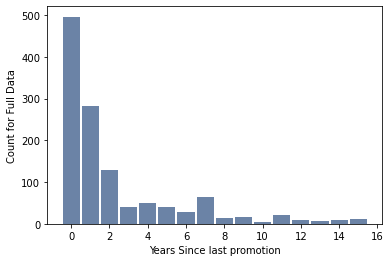

In [81]:
# Histogram of YearsSinceLastPromotion             
hist = thinkstats2.Hist(employee_attr.YearsSinceLastPromotion, label='Years Since last promotion')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Years Since last promotion', ylabel='Count for Full Data')

In [19]:
#Removing employees with zero companies worked at -- doesn't make any sense when they are working at IBM
employee_attr = employee_attr[employee_attr.NumCompaniesWorked > 0]
employee_attr

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
0,41,Yes,Travel_Rarely,Sales,1,2,1,2,Female,3,2,Sales Executive,4,Single,5993,8,11,3,1,0,8,0,1,6,4,0,5,71916
1,49,No,Travel_Frequently,Research & Development,8,1,2,3,Male,2,2,Research Scientist,2,Married,5130,1,23,4,4,1,10,3,3,10,7,1,7,61560
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,15,3,2,0,7,3,3,0,0,0,0,25080
3,33,No,Travel_Frequently,Research & Development,3,4,5,4,Female,3,1,Research Scientist,3,Married,2909,1,11,3,3,0,8,3,3,8,7,3,0,34908
4,27,No,Travel_Rarely,Research & Development,2,1,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,12,3,4,1,6,3,3,2,2,2,2,41616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,2061,3,Male,4,2,Laboratory Technician,4,Married,2571,4,17,3,3,1,17,3,3,5,2,0,3,30852
1466,39,No,Travel_Rarely,Research & Development,6,1,2062,4,Male,2,3,Healthcare Representative,1,Married,9991,4,15,3,1,1,9,5,3,7,7,1,7,119892
1467,27,No,Travel_Rarely,Research & Development,4,3,2064,2,Male,4,2,Manufacturing Director,2,Married,6142,1,20,4,2,1,6,0,3,6,2,0,3,73704
1468,49,No,Travel_Frequently,Sales,2,3,2065,4,Male,2,2,Sales Executive,2,Married,5390,2,14,3,4,0,17,3,2,9,6,0,8,64680


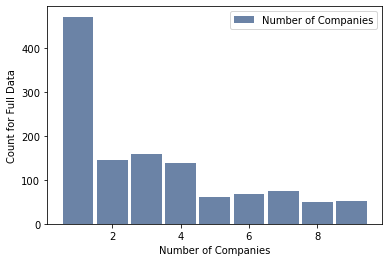

In [20]:
hist = thinkstats2.Hist(employee_attr.NumCompaniesWorked, label='Number of Companies')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of Companies', ylabel='Count for Full Data')

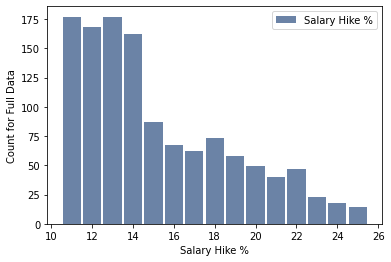

In [21]:
hist = thinkstats2.Hist(employee_attr.PercentSalaryHike, label='Salary Hike %')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Salary Hike %', ylabel='Count for Full Data')

Percentage increase in salary

•	I don't think this variable is very useful as the percentage increase in salary usually depends on multiple factors such as the company's overall yearly performance, an employee's performance reviews, etc.

•	In terms of determining why an employee would leave a company, I think yearly income is more of a telling sign than percentage increase. Therefore, I am going to remove this variable.



In [22]:
employee_attr = employee_attr.drop(columns=['PercentSalaryHike'])
employee_attr

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
0,41,Yes,Travel_Rarely,Sales,1,2,1,2,Female,3,2,Sales Executive,4,Single,5993,8,3,1,0,8,0,1,6,4,0,5,71916
1,49,No,Travel_Frequently,Research & Development,8,1,2,3,Male,2,2,Research Scientist,2,Married,5130,1,4,4,1,10,3,3,10,7,1,7,61560
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,3,2,0,7,3,3,0,0,0,0,25080
3,33,No,Travel_Frequently,Research & Development,3,4,5,4,Female,3,1,Research Scientist,3,Married,2909,1,3,3,0,8,3,3,8,7,3,0,34908
4,27,No,Travel_Rarely,Research & Development,2,1,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,3,4,1,6,3,3,2,2,2,2,41616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,2061,3,Male,4,2,Laboratory Technician,4,Married,2571,4,3,3,1,17,3,3,5,2,0,3,30852
1466,39,No,Travel_Rarely,Research & Development,6,1,2062,4,Male,2,3,Healthcare Representative,1,Married,9991,4,3,1,1,9,5,3,7,7,1,7,119892
1467,27,No,Travel_Rarely,Research & Development,4,3,2064,2,Male,4,2,Manufacturing Director,2,Married,6142,1,4,2,1,6,0,3,6,2,0,3,73704
1468,49,No,Travel_Frequently,Sales,2,3,2065,4,Male,2,2,Sales Executive,2,Married,5390,2,3,4,0,17,3,2,9,6,0,8,64680


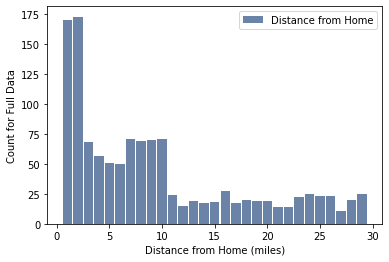

In [23]:
hist = thinkstats2.Hist(employee_attr.DistanceFromHome, label='Distance from Home')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Distance from Home (miles)', ylabel='Count for Full Data')

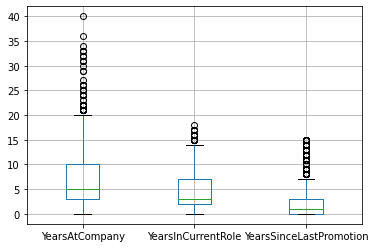

In [24]:
#Boxplots to check for outliers
boxplot = employee_attr.boxplot(column=['YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion'])

#Distributions are not completely normal -- slight skew to the right (higher end of scale with longer tails)

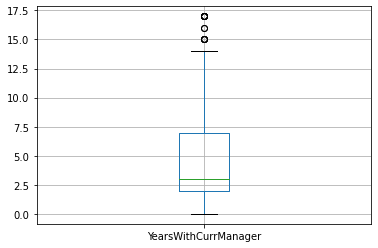

In [25]:
boxplot = employee_attr.boxplot(column=['YearsWithCurrManager'])

When looking at the years variables, it is tough to say if any entries are outliers, since employees often do and are even supposed to have varying years of experience at a company and within their career. At my company, there are employees with 35+ years, while I have less than a year, so I wouldn't say any of these outliers above the top of the boxplots are out of the ordinary or need to be removed.

Categorical Data Analysis

<AxesSubplot:>

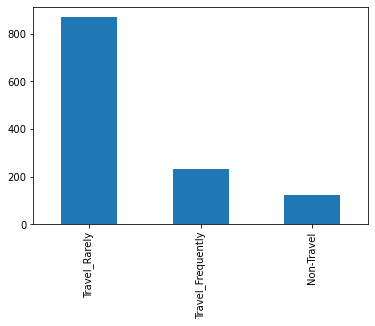

In [26]:
employee_attr['BusinessTravel'].value_counts().plot(kind='bar')

<AxesSubplot:>

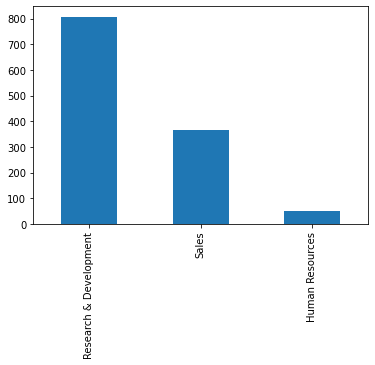

In [27]:
employee_attr['Department'].value_counts().plot(kind='bar')

[Text(0, 0, 'College'),
 Text(1, 0, 'Below College'),
 Text(2, 0, 'Master'),
 Text(3, 0, 'Bachelor'),
 Text(4, 0, 'Doctor')]

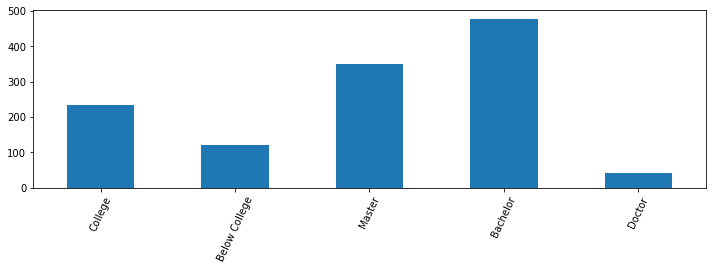

In [28]:
x = employee_attr['Education'].unique()
y = employee_attr['Education'].value_counts()
s = pd.Series(y, index=x)

#indexes
idx = np.asarray([i for i in range(len(x))])
#names
education = ['College','Below College','Master','Bachelor','Doctor']

ax = s.plot(kind='bar', figsize=(10, 3))
ax.figure.tight_layout()
ax.set_xticks(idx)
ax.set_xticklabels(education, rotation=65)

In [29]:
#Looking at data with Doctorate degree -- see what field they contribute to
doctor = employee_attr[employee_attr.Education == 5]
doctor

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
52,44,No,Travel_Rarely,Sales,1,5,68,2,Female,3,2,Sales Executive,1,Divorced,5454,5,4,3,1,9,2,2,4,3,1,3,65448
56,35,No,Travel_Frequently,Sales,18,5,74,2,Male,3,3,Sales Executive,1,Married,9069,1,4,4,1,9,3,2,9,8,1,8,108828
61,38,No,Travel_Frequently,Research & Development,29,5,79,4,Female,3,2,Laboratory Technician,4,Single,2406,1,3,4,0,10,2,3,10,3,9,9,28872
142,38,No,Travel_Rarely,Research & Development,3,5,193,4,Female,3,2,Research Scientist,3,Single,4317,3,4,2,0,19,2,3,3,2,2,2,51804
151,35,No,Travel_Rarely,Sales,1,5,204,3,Male,3,3,Sales Executive,2,Married,7295,1,3,1,2,10,3,3,10,8,0,6,87540
169,32,No,Travel_Rarely,Research & Development,6,5,231,3,Male,3,1,Research Scientist,3,Single,3038,3,4,1,0,8,2,3,5,4,1,4,36456
208,40,No,Non-Travel,Research & Development,9,5,287,4,Male,2,2,Healthcare Representative,4,Married,4876,9,3,4,1,5,5,1,3,2,0,2,58512
329,47,No,Travel_Rarely,Research & Development,5,5,447,4,Male,3,5,Research Director,3,Married,18300,4,3,2,1,21,2,3,3,2,1,1,219600
348,42,No,Travel_Rarely,Research & Development,23,5,468,1,Female,3,4,Research Director,4,Single,15992,2,3,2,0,16,2,3,1,0,0,0,191904
358,36,No,Non-Travel,Sales,1,5,479,4,Female,3,2,Sales Executive,4,Single,6653,4,3,2,0,7,6,3,1,0,0,0,79836


In [30]:
print(doctor.shape)
#42 rows

(42, 27)


The sample of employees with education "Below College" would be interesting to explore as you usually don't expect these people to have as many years at a company or if any job/career at all, but this is definitely a bias that I have learned from my education as well.

### PMFs, CDFs

In [31]:
employee_attr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
YearlyIncome                 int64
dtype: object

Separating the Employee Attrition dataset into two subsets: one for employees that have left the company (Yes) and one for employees that are still with the company (No)

In [32]:
attrition_yes = employee_attr[employee_attr.Attrition == "Yes"]
attrition_yes.shape

(190, 27)

In [33]:
attrition_no = employee_attr[employee_attr.Attrition == "No"]
attrition_no.shape

(1032, 27)

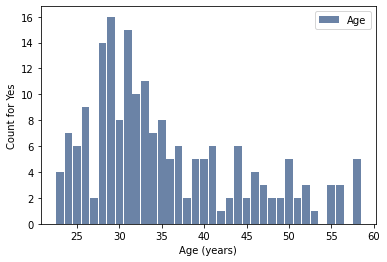

In [34]:
hist = thinkstats2.Hist(attrition_yes.Age, label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age (years)', ylabel='Count for Yes')

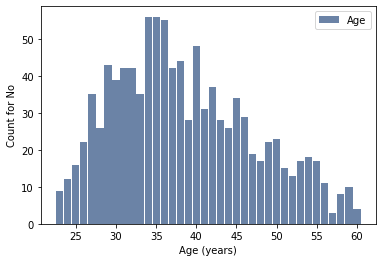

In [35]:
hist = thinkstats2.Hist(attrition_no.Age, label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age (years)', ylabel='Count for No')

The distribution of age for both datasets is relatively left-skewed; more employees are at the younger end of the age scale around 25-35 years old. There are few employees past the age of 45 years or so. Therefore, in both groups, we can see some overlap in age distributions, which could potentially show that age does not play as impactful of a factor in whethere there is employee attrition at a company.

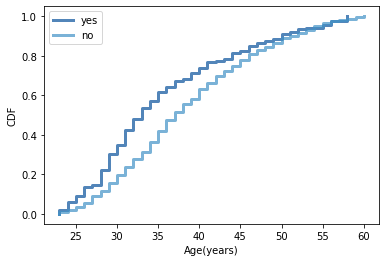

In [36]:
yes_ageCdf = thinkstats2.Cdf(attrition_yes.Age, label='yes')
no_ageCdf = thinkstats2.Cdf(attrition_no.Age, label='no')

thinkplot.PrePlot(2)
thinkplot.Cdfs([yes_ageCdf, no_ageCdf])
thinkplot.Config(xlabel='Age(years)', ylabel='CDF')

From looking at the CDFs for Age in terms of 'yes' or 'no' employee attrition, they have more spread from about ages 25-45, which is when the employees who left the company were more likely to be those ages or younger than the "no" group or the employees who chose at the stay company. Therefore, this could show for that age range that it's a more popular time for employees to choose to leave a company, which would make sense given that it's a defining time in people's lives and people are told to explore and experiment more in their careers.

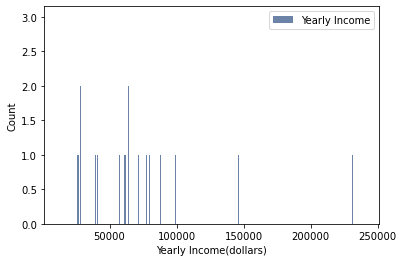

In [37]:
#Histogram of ages
hist = thinkstats2.Hist(employee_attr.YearlyIncome, label='Yearly Income')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Yearly Income(dollars)', ylabel='Count')

In [38]:
#Normalize the distribution
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

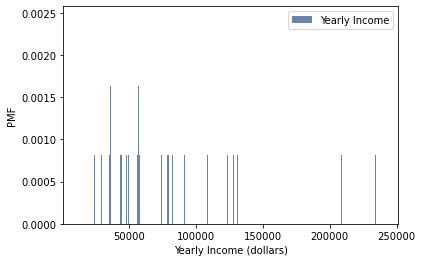

In [39]:
#PMF of Age
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Yearly Income (dollars)', ylabel='PMF')

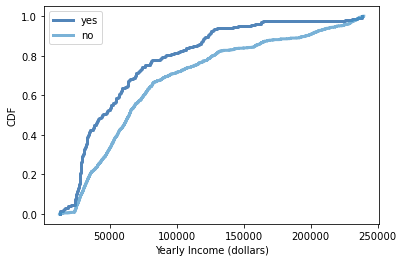

In [40]:
yes_incomeCdf = thinkstats2.Cdf(attrition_yes.YearlyIncome, label='yes')
no_incomeCdf = thinkstats2.Cdf(attrition_no.YearlyIncome, label='no')

thinkplot.PrePlot(2)
thinkplot.Cdfs([yes_incomeCdf, no_incomeCdf])
thinkplot.Config(xlabel='Yearly Income (dollars)', ylabel='CDF')

*Issues with bar chart -- right-hand plot is a step function

Comparing the Yearly Income distributions between "yes" attribution and "no" attribution -- won't be misled by sample size

Throughout the CDFs of yearly income, the "yes" group is at a higher percentile than the "no" group for the income range values. Therefore, at any point, the employees who left the company are more likely to be making that salary or less than the other group. The people who left the company are judged to usually be making more money than the others who stayed, which is interesting given that I thought they would leave to make more money elsewhere.

In [41]:
#PMFs of years since last promotion among the two groups
yes_promotionPmf = thinkstats2.Pmf(attrition_yes.YearsSinceLastPromotion, label='yes')
no_promotionPmf = thinkstats2.Pmf(attrition_no.YearsSinceLastPromotion, label='no')

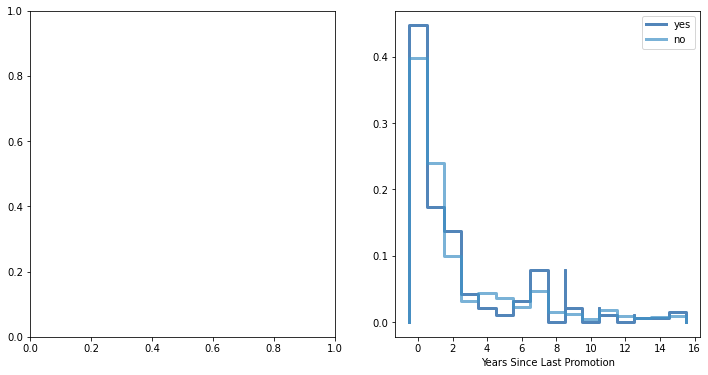

In [42]:
width=0.45
thinkplot.PrePlot(2, cols=2)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([yes_promotionPmf, no_promotionPmf])
thinkplot.Config(xlabel='Years Since Last Promotion')

The "yes" population goes back and forth among the distribution plot in comparison to the "no" group, there are many fluctuations in probability in terms of Yearly Income.

In trying to find a general pattern, the "yes" group seems to be more likely to have fewer years since their last promotion than the "no" group, which would signify that they are recently in newer positions which could increase work pressure and stress. However, at the greater end of the year scale, the "yes" group is also slightly more likely than the "no" to have those years since their last promotion, which would be quite a long time for someone to be at the same job level, which can be a reason for job movement.

Therefore, this variable is not really helpful in showing how it plays into employee attrition.

In [43]:
#PMFs of years in current role among the two groups
yes_currPmf = thinkstats2.Pmf(attrition_yes.YearsInCurrentRole, label='yes')
no_currPmf = thinkstats2.Pmf(attrition_no.YearsInCurrentRole, label='no')

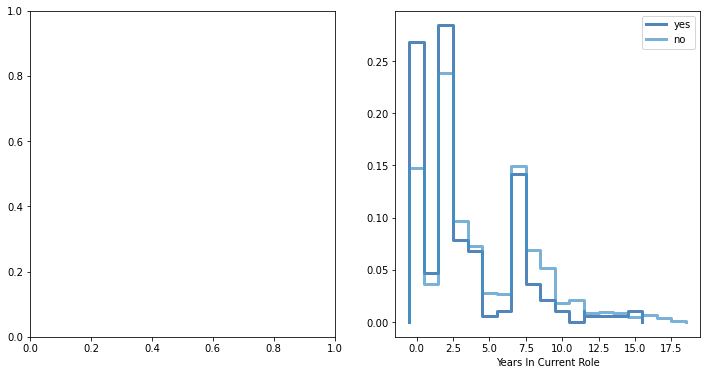

In [44]:
width=0.45
thinkplot.PrePlot(2, cols=2)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([yes_currPmf, no_currPmf])
thinkplot.Config(xlabel='Years In Current Role')

Employees who left the company are more likely to have spent less/fewer years in their current role than employees who stayed at the company. This higher probability goes until about 5 years at the company.

In [45]:
#PMFs of job satisfaction among the two groups
yes_jobPmf = thinkstats2.Pmf(attrition_yes.JobSatisfaction, label='yes')
no_jobPmf = thinkstats2.Pmf(attrition_no.JobSatisfaction, label='no')

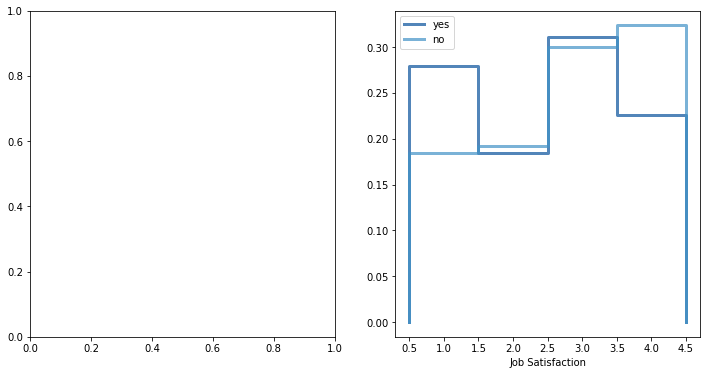

In [46]:
width=0.45
thinkplot.PrePlot(2, cols=2)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([yes_jobPmf, no_jobPmf])
thinkplot.Config(xlabel='Job Satisfaction')

This PMF comparison between "yes" and "no" has quick fluctuations, but at the lower and higher ends of the Job Satisfaction scale, the "yes" group is more likely to have a lower job satisfaction and the "no" group is more likely to have a higher job satisfaction (3.5-4.5).

This definitely aligns with reasoning for an employee to leave a company, because if someone is not satisfied with their job, they more likely will look for ways to leave their company to find jobs that satisfy them and that they are passionate about. No one wants to be in a job they don't like !

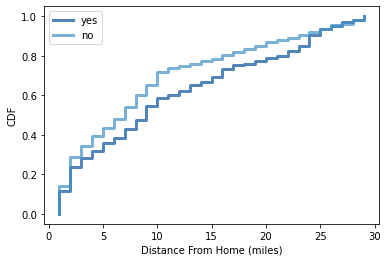

In [47]:
#Distance from home CDFs
yes_distCdf = thinkstats2.Cdf(attrition_yes.DistanceFromHome, label='yes')
no_distCdf = thinkstats2.Cdf(attrition_no.DistanceFromHome, label='no')

thinkplot.PrePlot(2)
thinkplot.Cdfs([yes_distCdf, no_distCdf])
thinkplot.Config(xlabel='Distance From Home (miles)', ylabel='CDF')

The CDFs for both attribution groups follow the same trend in distribution in terms of employees' Distance From Home.

The "no" group was higher in percentage than the "yes" group throughout which could show that more of the employees that stayed at the company are likely to be that certain distance from home than the other group that chose to leave. The distance does not factor in as much to their decision of being at a company, which would be interesting to do more analysis on!

### Analytical Distribution

In [48]:
#Using a normal model to fit the distribution of Age
ages = employee_attr.Age.dropna()

Mean, Var 37.996661101836395 71.62937115559873
Sigma 8.46341368217333


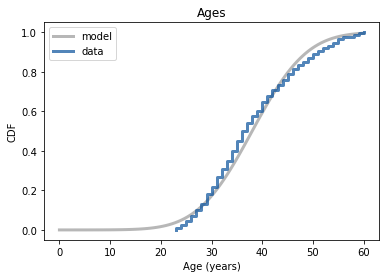

In [49]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(ages, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=60)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(ages, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Ages',
                 xlabel='Age (years)',
                 ylabel='CDF')

Below the 10th percentile, there is a discrepancy between the data and the model; there are less young employees than we would expect in a normal distributions. However, this is due to the removal of the younger employees (< age 18) from the dataset, because I considered them to be outliers and just not relevant to a dataset regarding full-time employees choosing whether to leave a company.

Since I am not specifically interested in employees less than the age of ~23, then I am not incredibly disappointed by the use of the normal model for this data/variable.

### Relationship between Variables

In [50]:
#Select random subset of the dataset
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

In [51]:
#Looking at Job Satisfaction and Years Since Last Promotion
sample = SampleRows(employee_attr, 700)
age, salary = sample.Age, sample.YearlyIncome

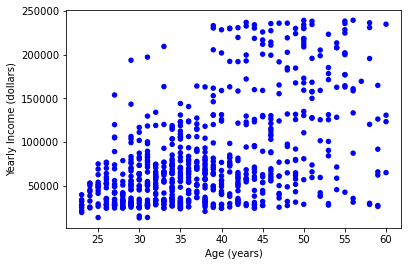

In [52]:
thinkplot.Scatter(age, salary, alpha=1)
thinkplot.Config(xlabel='Age (years)',
                 ylabel='Yearly Income (dollars)',
                 legend=False)

We need to add random noise to the data, since the data is packed into columns. For creating the Yearly Income variable, I multiplied the monthly income by 12, but it looks like the monthly income was rounded off to the nearest whole number. Therefore, we need to jitter the data by the thousands. I wanted to do it in intervals of 12,000.

In [53]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

salaries = Jitter(salary, 36000)

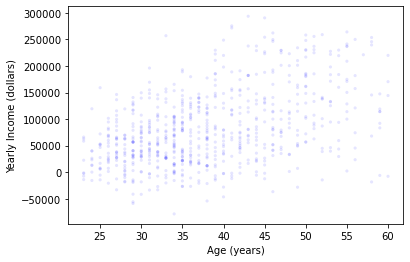

In [54]:
thinkplot.Scatter(age, salaries, alpha=0.1, s=10)
thinkplot.Config(xlabel='Age (years)',
                 ylabel='Yearly Income (dollars)',
                 legend=False)

From initial exploration of the scatter plot between Age and Yearly Income (Salary), there appears to be a positive relationship meaning as the age of an employee increases, their yearly income increases as well (i.e. they start to make more money). The relationship also appears to be linear, as it doesn't seem like any other specific function would fit to the data better than a straight line.

### Covariance - Tendency of two variables to vary together

In [55]:
#Drop any rows that are missing age or Yearly Income
cleaned = employee_attr.dropna(subset=['Age', 'YearlyIncome'])

In [56]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [57]:
ages, salaries = cleaned.Age, cleaned.YearlyIncome
Cov(ages, salaries)

#Positive covariance value means that the variables' deviations from the mean have the same signs -- go in the same direction

238142.70471792374

### Correlation - Strength of relationship between 2 variables

Pearson's

In [58]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [59]:
Corr(ages, salaries)

0.47099630845793977

The correlation of Age & Yearly Income (salary) is about 0.47, which is a moderately positive correlation.

Spearman's Rank Correlation -- Mitigates the effect of outliers

In [60]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [61]:
SpearmanCorr(ages, salaries)

#Correlation value decreases from Pearson's to Spearmans, 0.47 --> 0.43
#Therefore, this could show that the relationship between the 2 variables is actually linear 
#and/or the distributions are not skewed/do not contain outliers

0.42890204368639934

### Correlation & Causation

In terms of the relationship between Age & Yearly Income, even though we witnessed a positive relationship between the two variables, I definitely think there other factors that cause both Age and Salary, such as years of experience, role at a company, etc. An employee's salary is highly dependent on many factors about an individual and their work performance, but age definitely does have an impact since it aligns with knowledge and expertise and years that one is actually able to work.

## Hypothesis Testing

In [62]:
np.mean(attrition_yes.YearlyIncome)

61643.242105263154

In [63]:
np.mean(attrition_no.YearlyIncome)

85108.54651162791

I want to investigate/test the difference in mean yearly income (salary) that we see between the employees that left the company and the employees that stayed.

I want to know if that effect reflects a real difference for employees in the U.S., or if it might appear in the sample by chance.

In [64]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [65]:
#To compute the p-value of an observed difference in means, 
#we can assume that there is no difference between the groups and generate simulated results by shuffling the data.
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [66]:
data = attrition_no.YearlyIncome.values, attrition_yes.YearlyIncome.values

In [67]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

The p-value is equal to 0.0, which is less than both of the statistically significant values of 0.05 and 0.01, which means that it is plausible that the observed difference in mean yearly income is not just the result of random sampling. We could generalize it to the population.

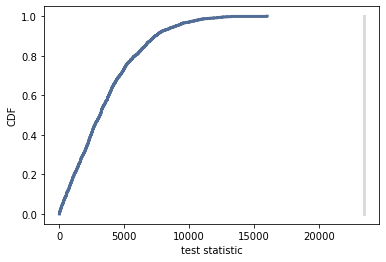

In [68]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

I would expect that the mean yearly income for people in the non-attrition group is higher than the mean yearly income for people in the attrition group, since I expect people to leave their job in order to make more money somewhere else. Therefore, we can also conduct a one-sided hypothesis test for these means.

In [69]:
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat

In [70]:
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

0.0

The p-value result is still statistically significant for the one-sided hypothesis that attrition_yes' mean yearly income will be greater than attrition_no's mean yearly income. Therefore, we can also conclude at p = 0, that the observed one-sided difference could also be generalized to the population and not just our sample of IBM employees.

### Regression Analysis

Logistic Regression with Attrition as the dependent variable -- binary categorical variable

In [71]:
#Coding Attrition field with numbers
#Baseline category -- no, employees don't leave the company
employee_attr['no'] = (employee_attr.Attrition=='No').astype(int)

In [72]:
import statsmodels.formula.api as smf
#Start logistic model with just Age
model = smf.logit('no ~ Age', data=employee_attr)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.424503
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     no   No. Observations:                 1222
Model:                          Logit   Df Residuals:                     1220
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Nov 2022   Pseudo R-squ.:                 0.01759
Time:                        21:49:19   Log-Likelihood:                -518.74
converged:                       True   LL-Null:                       -528.03
Covariance Type:            nonrobust   LLR p-value:                 1.635e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1758      0.363      0.484      0.628      -0.536       0.888
Age            0.0410      0.010      4.162      0.000       0.022       0.060
==============================================================================
"""

Age seems to have a relatively big effect with a p-value = 0, and being statistically significant at p = 0.05 and p = 0.01.

In [73]:
#Second logistic model with other variables that I deemed to be related to our question
#Age, YearlyIncome, YearsSinceLastPromotion, YearsInCurrentRole, JobSatisfaction, DistanceFromHome
model2 = smf.logit('no ~ Age + YearlyIncome + YearsSinceLastPromotion + YearsInCurrentRole + JobSatisfaction + DistanceFromHome', data=employee_attr)
results2 = model2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.398660
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     no   No. Observations:                 1222
Model:                          Logit   Df Residuals:                     1215
Method:                           MLE   Df Model:                            6
Date:                Sat, 19 Nov 2022   Pseudo R-squ.:                 0.07740
Time:                        21:49:20   Log-Likelihood:                -487.16
converged:                       True   LL-Null:                       -528.03
Covariance Type:            nonrobust   LLR p-value:                 1.566e-15
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.3203      0.432     -0.741      0.458      -1.167       0.526
Age                         0.0245      0.011      2.245      0.025       0.003       0.046
YearlyIncome             7.315e-06   2.12e-06      3.448      0.001    3.16e-06    1.15e-05
YearsSinceLastPromotion    -0.1313      0.033     -3.973      0.000      -0.196      -0.067
YearsInCurrentRole          0.1513      0.033      4.611      0.000       0.087       0.216
JobSatisfaction             0.2334      0.073      3.182      0.001       0.090       0.377
DistanceFromHome           -0.0314      0.009     -3.314      0.001      -0.050      -0.013
===========================================================================================
"""

Making a prediction with just Age model

In [74]:
endog = pd.DataFrame(model.endog, columns=[model.endog_names])
exog = pd.DataFrame(model.exog, columns=model.exog_names)

In [75]:
actual = endog['no']
baseline = actual.mean()
baseline

#Right almost 84.5% of the time

0.8445171849427169

In [76]:
predict = (results.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)
sum(true_pos), sum(true_neg)

#Calculating accuracy
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
acc

#Accuracy is same as baseline

0.8445171849427169

Making a prediction with 6 predictor model

In [77]:
endog2 = pd.DataFrame(model2.endog, columns=[model2.endog_names])
exog2 = pd.DataFrame(model2.exog, columns=model2.exog_names)

In [78]:
actual2 = endog2['no']
baseline2 = actual2.mean()
baseline2

0.8445171849427169

In [79]:
predict = (results2.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)
sum(true_pos), sum(true_neg)

#Calculating accuracy
acc2 = (sum(true_pos) + sum(true_neg)) / len(actual)
acc2

#Accuracy is slightly better than baseline for model 2 -- 84.6%

0.8461538461538461

Between our model with just Age as a predictor and the other model with the 6 predictors for predicting employee attrition, the accuracy does not change very much ... only increases by .1%. Also, the baseline prediction strategy is correct the same percentage of time for each of the models, approx. 84.45%.